# Bibliotecas 

In [26]:
import nltk
import spacy
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from sumy.summarizers.luhn import LuhnSummarizer
from nltk import pos_tag

import matplotlib.pyplot as plt
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers import lex_rank

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nesto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nesto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nesto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nesto\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Carga y limpieza de datos

In [27]:
# Cargar el archivo desde el directorio "/content/"
df = pd.read_csv('IMDB Dataset.csv')

In [28]:
# Limpieza de datos
df['cleaned_review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

In [29]:
# Reemplazar nuevas líneas con espacios
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: x.replace('<br /><br />', ' '))

# División de texto en oraciones usando spaCy

In [30]:
# Tarea 1: División de texto en oraciones usando spaCy
nlp = spacy.load('en_core_web_sm')

def spacy_sentence_tokenize(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

df['sentences_spacy'] = df['cleaned_review'].apply(spacy_sentence_tokenize)

print("\nResultado de Tarea 1: ")
print(df['sentences_spacy'].head())


Resultado de Tarea 1: División de texto en oraciones usando spaCy
0    [one of the other reviewers has mentioned that...
1    [a wonderful little production br br the filmi...
2    [i thought this was a wonderful way to spend t...
3    [basically theres a family where a little boy ...
4    [petter matteis love in the time of money is a...
Name: sentences_spacy, dtype: object


# Etiquetación de un texto en palabras

In [31]:
# Tarea 2: Etiquetación de un texto en palabras usando spaCy
def spacy_pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

df['pos_tags_spacy'] = df['cleaned_review'].apply(spacy_pos_tagging)

print("\nResultado de Tarea 2: Etiquetación de un texto en palabras usando spaCy")
print(df['pos_tags_spacy'].head())


Resultado de Tarea 2: Etiquetación de un texto en palabras usando spaCy
0    [(one, NUM), (of, ADP), (the, DET), (other, AD...
1    [(a, DET), (wonderful, ADJ), (little, ADJ), (p...
2    [(i, PRON), (thought, VERB), (this, PRON), (wa...
3    [(basically, ADV), (there, PRON), (s, VERB), (...
4    [(petter, PROPN), (matteis, PROPN), (love, NOU...
Name: pos_tags_spacy, dtype: object


In [32]:
# Definir la función para etiquetar el texto
def spacy_pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Crear un nuevo DataFrame con las palabras y sus etiquetas
tagged_words_df = pd.DataFrame(df['pos_tags_spacy'].explode().tolist(), columns=['palabra', 'etiqueta'])

# Guardar el DataFrame en un archivo CSV
tagged_words_df.to_csv('etiquetas_palabras.csv', index=False)

print("\nResultado de Tarea: Etiquetación de un texto en palabras usando spaCy")
print(tagged_words_df.head())



Resultado de Tarea: Etiquetación de un texto en palabras usando spaCy
     palabra etiqueta
0        one      NUM
1         of      ADP
2        the      DET
3      other      ADJ
4  reviewers     NOUN


# Cantidad de cada tipo de palabra

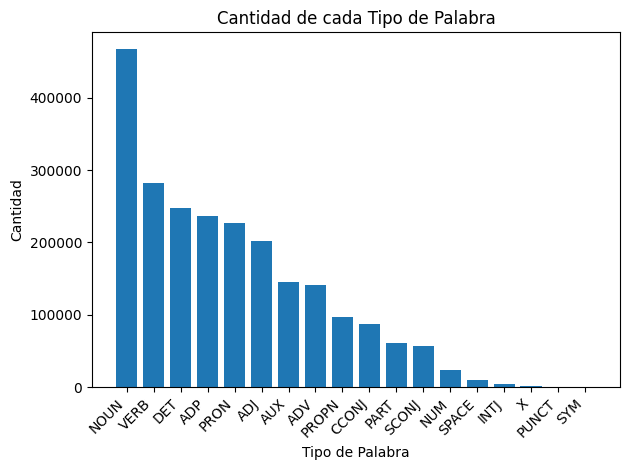


Resultado de Tarea: Etiquetación de un texto en palabras usando spaCy
     palabra etiqueta
0        one      NUM
1         of      ADP
2        the      DET
3      other      ADJ
4  reviewers     NOUN


In [33]:
# Definir la función para etiquetar el texto
def spacy_pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Aplicar la función a las reseñas y almacenar los resultados en una nueva columna
df['pos_tags_spacy'] = df['cleaned_review'].apply(spacy_pos_tagging)

# Crear un nuevo DataFrame con las palabras y sus etiquetas
tagged_words_df = pd.DataFrame(df['pos_tags_spacy'].explode().tolist(), columns=['palabra', 'etiqueta'])

# Clasificar las palabras por tipo (adjetivo, número, etc.)
word_types = tagged_words_df['etiqueta'].value_counts()

# Graficar la cantidad de cada tipo de palabra
plt.bar(word_types.index, word_types.values)
plt.xlabel('Tipo de Palabra')
plt.ylabel('Cantidad')
plt.title('Cantidad de cada Tipo de Palabra')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Guardar el DataFrame en un archivo CSV
tagged_words_df.to_csv('etiquetas_palabras.csv', index=False)

print("\nResultado de Tarea: Etiquetación de un texto en palabras usando spaCy")
print(tagged_words_df.head())


# Palabras más frecuentes


Resultado de Tarea: Contabilizar palabras más frecuentes en un documento usando NLTK
[('the', 130413), ('and', 62845), ('a', 62799), ('of', 56472), ('to', 52092), ('is', 41512), ('in', 36229), ('it', 29940), ('i', 29355), ('this', 29320), ('that', 26584), ('br', 22579), ('was', 18489), ('as', 17790), ('with', 17130), ('for', 16997), ('movie', 16481), ('but', 15991), ('film', 14287), ('on', 13165), ('not', 11982), ('you', 11757), ('are', 11361), ('his', 11048), ('have', 10811), ('be', 10368), ('he', 9974), ('one', 9839), ('its', 9637), ('at', 8961), ('all', 8855), ('by', 8533), ('an', 8354), ('they', 8215), ('from', 7983), ('who', 7940), ('so', 7801), ('like', 7702), ('just', 6996), ('or', 6939), ('her', 6851), ('about', 6653), ('if', 6525), ('out', 6393), ('has', 6349), ('there', 6076), ('what', 6071), ('some', 5979), ('good', 5670), ('when', 5497)]


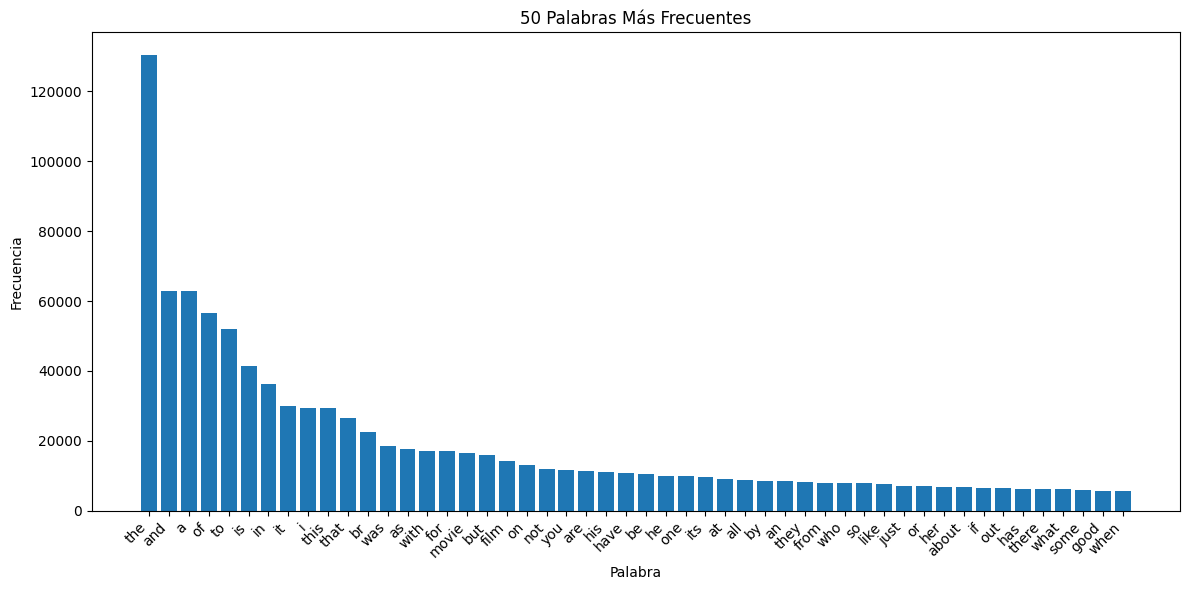

In [36]:
# Obtener todas las palabras en una lista
all_words = [word for tokens in df['tokens_nltk'] for word in tokens]

# Calcular la frecuencia de las palabras
word_freq = FreqDist(all_words)

# Imprimir las 50 palabras más frecuentes
print("\nResultado de Tarea: Contabilizar palabras más frecuentes en un documento usando NLTK")
print(word_freq.most_common(50))

# Crear la gráfica de las 50 palabras más frecuentes
plt.figure(figsize=(12, 6))
words, frequencies = zip(*word_freq.most_common(50))
plt.bar(words, frequencies)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('50 Palabras Más Frecuentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Resumen de texto

In [37]:
# Función auxiliar para obtener el resumen usando LuhnSummarizer
def get_luhn_summary(text, sentences_count=2):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LuhnSummarizer()
    summary = summarizer(parser.document, sentences_count)
    return " ".join([str(sentence) for sentence in summary])

# Tarea: Resumen de texto usando la librería SUMY
df['text_summary'] = df['cleaned_review'].apply(lambda x: get_luhn_summary(x, sentences_count=2))

# Mostrar resultado de Tarea: Resumen de texto usando la librería SUMY
print("\nResultado de Tarea: Resumen de texto usando la librería SUMY")
print(df['text_summary'].head())



Resultado de Tarea: Resumen de texto usando la librería SUMY
0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: text_summary, dtype: object


# Distribución de frecuencias de palabras

In [38]:
# Tarea: Distribución de frecuencias de palabras en un la reseña usando NLTK
print("\nDistribución de frecuencias de palabras en un la reseña")
df['word_freq'] = df['cleaned_review'].apply(lambda x: FreqDist(word_tokenize(x.lower())))
print(df['word_freq'].head())


Distribución de frecuencias de palabras en un la reseña
0    {'one': 1, 'of': 7, 'the': 16, 'other': 2, 're...
1    {'a': 4, 'wonderful': 1, 'little': 2, 'product...
2    {'i': 3, 'thought': 2, 'this': 5, 'was': 4, 'a...
3    {'basically': 1, 'theres': 2, 'a': 10, 'family...
4    {'petter': 1, 'matteis': 2, 'love': 1, 'in': 6...
Name: word_freq, dtype: object


# Cantidad de "positive" y "negative"

In [39]:
# Contar la cantidad de "positive" y "negative" en la columna 'sentiment'
sentiment_counts = df['sentiment'].value_counts()

print("Cantidad de 'positive' y 'negative' en la columna 'sentiment':")
print(sentiment_counts)


Cantidad de 'positive' y 'negative' en la columna 'sentiment':
sentiment
positive    4914
negative    4870
Name: count, dtype: int64


In [ ]:
# Crear una gráfica de barras para visualizar las cantidades
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Cantidad')
plt.title('Cantidad de "positive" y "negative"')
plt.show()


# Número de palabras en cada reseña

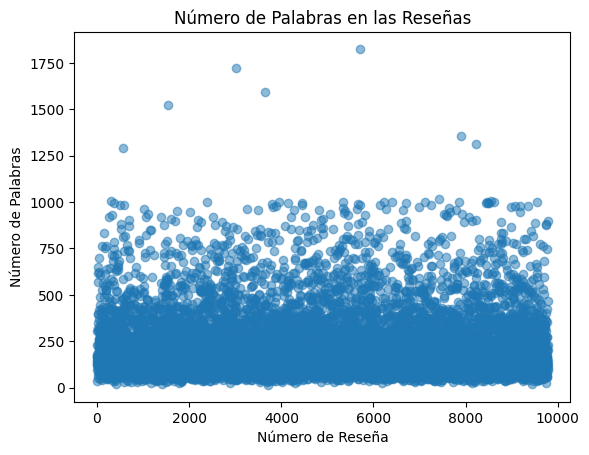

In [40]:
# Calcular el número de palabras en cada reseña y almacenar en una nueva columna 'num_words'
df['num_words'] = df['cleaned_review'].apply(lambda x: len(x.split()))

# Crear la gráfica de dispersión
plt.scatter(df.index, df['num_words'], alpha=0.5)
plt.xlabel('Número de Reseña')
plt.ylabel('Número de Palabras')
plt.title('Número de Palabras en las Reseñas')
plt.show()


# Adjetivos más Repetidos en Reseñas Positivas

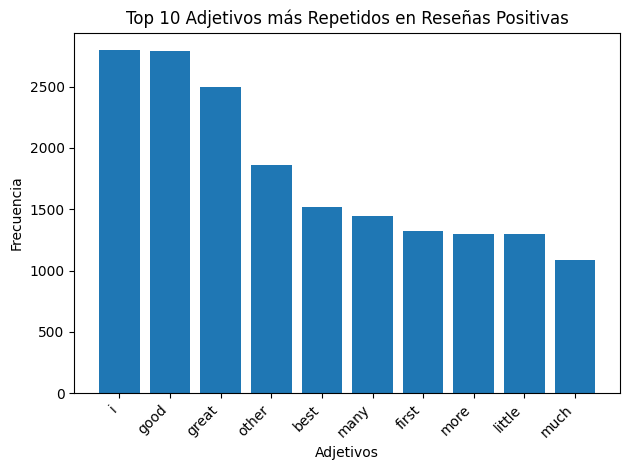

In [41]:
# Función para obtener los adjetivos de una reseña
def get_adjectives(text):
    tokens = word_tokenize(text.lower())
    # Utilizamos una expresión regular para filtrar solo palabras con caracteres alfabéticos
    filtered_tokens = [token for token in tokens if re.match(r'^[a-zA-Z]+$', token)]
    tagged_words = pos_tag(filtered_tokens)
    adjectives = [word for word, tag in tagged_words if tag.startswith('JJ')]
    return adjectives

# Obtener todos los adjetivos de las reseñas positivas
positive_adjectives = [adj for review in positive_reviews for adj in get_adjectives(review)]

# Calcular la frecuencia de los adjetivos
adj_freq = FreqDist(positive_adjectives)

# Obtener los 10 adjetivos más repetidos
top_10_adjectives = adj_freq.most_common(10)

# Mostrar los adjetivos más repetidos en una gráfica de barras
adjectives, counts = zip(*top_10_adjectives)

# Configurar el formato de fuente para el texto en la gráfica
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.bar(adjectives, counts)
plt.xlabel('Adjetivos')
plt.ylabel('Frecuencia')
plt.title('Top 10 Adjetivos más Repetidos en Reseñas Positivas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Adjetivos más Repetidos en Reseñas Negativas

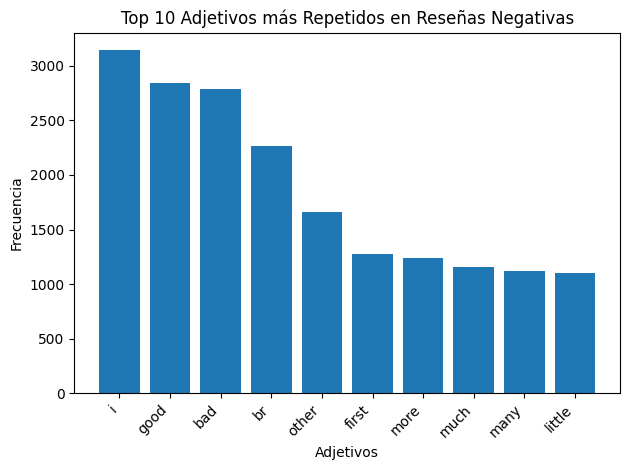

In [43]:
# Obtener todos los adjetivos de las reseñas negativas
negative_adjectives = [adj for review in negative_reviews for adj in get_adjectives(review)]

# Calcular la frecuencia de los adjetivos en las reseñas negativas
negative_adj_freq = FreqDist(negative_adjectives)

# Obtener los 10 adjetivos más repetidos en las reseñas negativas
top_10_negative_adjectives = negative_adj_freq.most_common(10)

# Mostrar los adjetivos más repetidos en una gráfica de barras
negative_adjectives, negative_counts = zip(*top_10_negative_adjectives)
plt.bar(negative_adjectives, negative_counts)
plt.xlabel('Adjetivos')
plt.ylabel('Frecuencia')
plt.title('Top 10 Adjetivos más Repetidos en Reseñas Negativas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Longitud de las reseñas (Diagrama de cajas)

In [ ]:
# Obtener las reseñas positivas y negativas
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review']
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# Calcular la longitud de las reseñas (número de palabras)
positive_review_lengths = positive_reviews.apply(lambda x: len(x.split()))
negative_review_lengths = negative_reviews.apply(lambda x: len(x.split()))

# Crear el diagrama de cajas
plt.boxplot([positive_review_lengths, negative_review_lengths], labels=['Positivas', 'Negativas'])
plt.xlabel('Sentimiento de la Reseña')
plt.ylabel('Longitud de la Reseña (Número de Palabras)')
plt.title('Distribución de Longitud de Reseñas entre Positivas y Negativas')
plt.show()
